<a href="https://colab.research.google.com/github/573737/TensorFlow_code/blob/Fall-model-code/Fall_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(42)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/final data old and new csv.csv')
df.head()

,Counter,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,...,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,RSSI,Action
0,19065.0,0.0,0.370667,-0.052429,0.131653,0.999999,0.001026,0.000325,0.000599,9.266663,...,0.029945,-0.703613,0.517090,0.605469,899.42,-22.144486,-69.316055,-131.113442,-81.0,801.0
1,19066.0,0.0,0.369054,-0.052545,0.129802,0.999998,0.001191,0.000365,0.000614,9.226346,...,0.030708,-0.705811,0.517090,0.596924,899.36,-22.120436,-69.252172,-130.999115,-81.0,801.0
2,19067.0,0.0,0.367676,-0.051453,0.125671,0.999998,0.001431,0.000423,0.000565,9.191895,...,0.028229,-0.703613,0.519043,0.596680,899.36,-22.048174,-69.184337,-130.907954,-83.0,801.0
3,19068.0,0.0,0.369162,-0.047967,0.127158,0.999999,0.000747,0.000381,0.000583,9.229040,...,0.029135,-0.706055,0.521240,0.596680,899.26,-22.063478,-69.120294,-130.808268,-84.0,801.0
4,19069.0,0.0,0.368469,-0.048401,0.127563,0.999999,0.000034,0.000314,0.000404,9.211731,...,0.020218,-0.703613,0.523438,0.593506,899.38,-22.117628,-69.071186,-130.746418,-82.0,801.0


In [3]:
df.shape[0]

1048575

In [4]:
# Drop rows with at least one null value
df = df.dropna()

In [5]:
df.shape[0]

822737

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822737 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Counter      822737 non-null  float64
 1   Temperature  822737 non-null  float64
 2   VelInc_X     822737 non-null  float64
 3   VelInc_Y     822737 non-null  float64
 4   VelInc_Z     822737 non-null  float64
 5   OriInc_w     822737 non-null  float64
 6   OriInc_x     822737 non-null  float64
 7   OriInc_y     822737 non-null  float64
 8   OriInc_z     822737 non-null  float64
 9   Acc_X        822737 non-null  float64
 10  Acc_Y        822737 non-null  float64
 11  Acc_Z        822737 non-null  float64
 12  Gyr_X        822737 non-null  float64
 13  Gyr_Y        822737 non-null  float64
 14  Gyr_Z        822737 non-null  float64
 15  Mag_X        822737 non-null  float64
 16  Mag_Y        822737 non-null  float64
 17  Mag_Z        822737 non-null  float64
 18  Pressure     822737 non-null

In [7]:
df.head()

,Counter,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,...,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,RSSI,Action
0,19065.0,0.0,0.370667,-0.052429,0.131653,0.999999,0.001026,0.000325,0.000599,9.266663,...,0.029945,-0.703613,0.517090,0.605469,899.42,-22.144486,-69.316055,-131.113442,-81.0,801.0
1,19066.0,0.0,0.369054,-0.052545,0.129802,0.999998,0.001191,0.000365,0.000614,9.226346,...,0.030708,-0.705811,0.517090,0.596924,899.36,-22.120436,-69.252172,-130.999115,-81.0,801.0
2,19067.0,0.0,0.367676,-0.051453,0.125671,0.999998,0.001431,0.000423,0.000565,9.191895,...,0.028229,-0.703613,0.519043,0.596680,899.36,-22.048174,-69.184337,-130.907954,-83.0,801.0
3,19068.0,0.0,0.369162,-0.047967,0.127158,0.999999,0.000747,0.000381,0.000583,9.229040,...,0.029135,-0.706055,0.521240,0.596680,899.26,-22.063478,-69.120294,-130.808268,-84.0,801.0
4,19069.0,0.0,0.368469,-0.048401,0.127563,0.999999,0.000034,0.000314,0.000404,9.211731,...,0.020218,-0.703613,0.523438,0.593506,899.38,-22.117628,-69.071186,-130.746418,-82.0,801.0


## Building a model based on the data collected

In [8]:
X=df.drop(["Counter","RSSI"],axis=1)
y=df['Action']

In [9]:
X,y

(         Temperature  VelInc_X  VelInc_Y  VelInc_Z  OriInc_w  OriInc_x  \
 0                0.0  0.370667 -0.052429  0.131653  0.999999  0.001026   
 1                0.0  0.369054 -0.052545  0.129802  0.999998  0.001191   
 2                0.0  0.367676 -0.051453  0.125671  0.999998  0.001431   
 3                0.0  0.369162 -0.047967  0.127158  0.999999  0.000747   
 4                0.0  0.368469 -0.048401  0.127563  0.999999  0.000034   
 ...              ...       ...       ...       ...       ...       ...   
 1048570          0.0  0.368715 -0.112285  0.069686  0.999999 -0.000120   
 1048571          0.0  0.372986 -0.113403  0.071289  0.999999 -0.000511   
 1048572          0.0  0.369099 -0.113426  0.072264  0.999999 -0.000337   
 1048573          0.0  0.369751 -0.113525  0.069519  0.999999 -0.000214   
 1048574          0.0  0.369901 -0.114298  0.070749  0.999999  0.000076   
 
          OriInc_y  OriInc_z     Acc_X     Acc_Y  ...     Gyr_Y     Gyr_Z  \
 0        0.000325  0

In [10]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(822737, 658189, 164548)

In [11]:
X_train

,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,Acc_Y,...,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,Action
353587,0.0,0.323425,-0.051147,0.187683,0.999834,0.000291,-0.011982,-0.013687,8.085632,-1.278687,...,-0.599131,-0.684394,-0.347412,-0.341553,-0.848145,887.24,-2.018099,-65.032958,21.562547,908.0
708560,0.0,0.331152,-0.129995,0.107941,0.999994,0.002201,0.000089,-0.002316,8.278799,-3.249884,...,0.004435,-0.115776,-0.613525,0.306396,-0.958496,891.72,-69.778016,-63.725050,54.656500,811.0
485199,0.0,0.363131,-0.077914,0.132799,0.999999,-0.000042,0.000034,-0.000057,9.078264,-1.947856,...,0.001717,-0.002861,-0.808105,0.430908,0.250244,898.86,-30.102339,-67.138185,-133.881128,919.0
654804,0.0,0.377687,-0.033187,0.054684,0.999997,-0.001812,0.000597,0.000549,9.442163,-0.829673,...,0.029850,0.027466,-0.951416,0.201416,0.682861,895.82,-27.348202,-81.676755,-137.929138,808.0
615188,0.0,0.004272,-0.151672,0.366272,0.999999,-0.000637,-0.000628,0.000343,0.106812,-3.791809,...,-0.031424,0.017166,0.874023,0.481689,-0.910889,878.48,-22.738160,-1.134352,-9.832006,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326694,0.0,-0.097015,-0.257604,-0.251405,0.999967,0.000421,0.005026,-0.006320,-2.425385,-6.440091,...,0.251296,-0.316003,0.142822,1.036865,-0.000244,899.34,-129.251104,10.490261,94.201155,907.0
446676,0.0,0.365788,-0.117243,0.092461,0.999999,0.000805,-0.000267,-0.000443,9.144711,-2.931070,...,-0.013351,-0.022125,-0.481201,0.748535,-0.485107,887.06,-50.454298,-68.397411,-14.278531,916.0
175927,0.0,0.376655,-0.103298,-0.020315,0.999999,0.000161,-0.000359,0.000103,9.416366,-2.582455,...,-0.017929,0.005150,-0.634033,0.862061,-0.342773,889.88,-100.694322,-73.930029,40.699496,811.0
838136,0.0,0.378445,-0.062300,0.089320,1.000000,0.000041,-0.000035,-0.000005,9.461117,-1.557493,...,-0.001764,-0.000238,-0.657959,-0.230469,-0.708252,896.22,-34.702654,-73.662871,62.065653,903.0


In [12]:
y_train

353587    908.0
708560    811.0
485199    919.0
654804    808.0
615188    806.0
          ...  
326694    907.0
446676    916.0
175927    811.0
838136    903.0
160361    810.0
Name: Action, Length: 658189, dtype: float64

## Creating the multi regression  model

In [13]:
import tensorflow as tf

In [14]:
# set random seed
tf.random.set_seed(42)

#create
model_trial=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model_trial.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

#fit
model_trial.fit(X_train,y_train,epochs=25)

Epoch 1/25
20569/20569 [==============================] - 45s 2ms/step - loss: 4.4716 - mae: 4.4716
Epoch 2/25
20569/20569 [==============================] - 40s 2ms/step - loss: 2.1513 - mae: 2.1513
Epoch 3/25
20569/20569 [==============================] - 42s 2ms/step - loss: 1.6314 - mae: 1.6314
Epoch 4/25
20569/20569 [==============================] - 43s 2ms/step - loss: 1.4387 - mae: 1.4387
Epoch 5/25
20569/20569 [==============================] - 39s 2ms/step - loss: 1.3362 - mae: 1.3362
Epoch 6/25
20569/20569 [==============================] - 40s 2ms/step - loss: 1.2824 - mae: 1.2824
Epoch 7/25
20569/20569 [==============================] - 42s 2ms/step - loss: 1.2443 - mae: 1.2443
Epoch 8/25
20569/20569 [==============================] - 39s 2ms/step - loss: 1.1212 - mae: 1.1212
Epoch 9/25
20569/20569 [==============================] - 43s 2ms/step - loss: 1.0742 - mae: 1.0742
Epoch 10/25
20569/20569 [==============================] - 41s 2ms/step - loss: 1.0426 - mae: 1.0426

In [15]:
# evaluate
model_trial.evaluate(X_test,y_test)

5143/5143 [==============================] - 9s 2ms/step - loss: 2.1442 - mae: 2.1442


[2.1442222595214844, 2.1442222595214844]

In [16]:
y_pred=model_trial.predict(X_test)
y_pred

5143/5143 [==============================] - 9s 2ms/step


array([[804.9004 ],
       [913.25287],
       [919.573  ],
       ...,
       [918.25   ],
       [913.1312 ],
       [914.1411 ]], dtype=float32)

In [17]:
y_pred=np.round(y_pred).astype(int)
y_pred

array([[805],
       [913],
       [920],
       ...,
       [918],
       [913],
       [914]])

In [18]:
y_test

36071      803.0
961418     911.0
462228     917.0
741763     813.0
357800     909.0
           ...  
265346     902.0
713798     811.0
1045153    916.0
965293     911.0
976940     912.0
Name: Action, Length: 164548, dtype: float64

In [19]:
y_test

36071      803.0
961418     911.0
462228     917.0
741763     813.0
357800     909.0
           ...  
265346     902.0
713798     811.0
1045153    916.0
965293     911.0
976940     912.0
Name: Action, Length: 164548, dtype: float64

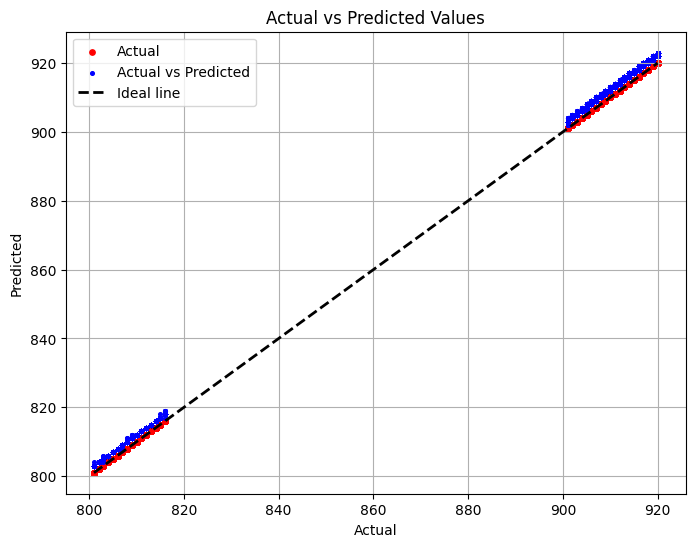

In [20]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, s=15, color='red', label='Actual')
plt.scatter(y_test, y_pred,s=7, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal line')  # Plotting ideal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
len(np.unique(y_train))

36

In [22]:
# set random seed
tf.random.set_seed(42)

# create
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="linear"),
    tf.keras.layers.Dense(10,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])

#compile
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=1),
    metrics=["mae"]
)

#fit
model_1.fit(X_train,y_train,epochs=35)


Epoch 1/35
20569/20569 [==============================] - 50s 2ms/step - loss: 3.7097 - mae: 3.7097
Epoch 2/35
20569/20569 [==============================] - 45s 2ms/step - loss: 2.1656 - mae: 2.1656
Epoch 3/35
20569/20569 [==============================] - 44s 2ms/step - loss: 1.7992 - mae: 1.7992
Epoch 4/35
20569/20569 [==============================] - 45s 2ms/step - loss: 1.6074 - mae: 1.6074
Epoch 5/35
20569/20569 [==============================] - 44s 2ms/step - loss: 1.5034 - mae: 1.5034
Epoch 6/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.4055 - mae: 1.4055
Epoch 7/35
20569/20569 [==============================] - 41s 2ms/step - loss: 1.3376 - mae: 1.3376
Epoch 8/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.3305 - mae: 1.3305
Epoch 9/35
20569/20569 [==============================] - 43s 2ms/step - loss: 1.3177 - mae: 1.3177
Epoch 10/35
20569/20569 [==============================] - 45s 2ms/step - loss: 1.2566 - mae: 1.2566

In [23]:
# evaluate
model_1.evaluate(X_test,y_test)

5143/5143 [==============================] - 9s 2ms/step - loss: 0.2714 - mae: 0.2714


[0.27135542035102844, 0.27135542035102844]

In [24]:
y_pred_1=model_1.predict(X_test)
y_pred_1

5143/5143 [==============================] - 6s 1ms/step


array([[802.71155],
       [910.90845],
       [916.7119 ],
       ...,
       [915.6494 ],
       [910.61646],
       [911.67334]], dtype=float32)

In [25]:
y_pred_1=np.round(y_pred_1).astype(int)
y_pred_1

array([[803],
       [911],
       [917],
       ...,
       [916],
       [911],
       [912]])

In [26]:
y_test

36071      803.0
961418     911.0
462228     917.0
741763     813.0
357800     909.0
           ...  
265346     902.0
713798     811.0
1045153    916.0
965293     911.0
976940     912.0
Name: Action, Length: 164548, dtype: float64

In [27]:
# set random seed
tf.random.set_seed(42)

# create
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="linear"),
    tf.keras.layers.Dense(10,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])

#compile
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

#fit
model_2.fit(X_train_map_nor,y_train_mapped,epochs=35,validation_data=((X_test_map_nor,y_test_mapped)))
#  X_train_map_nor and Y_train_mapped are definited in the later section below

NameError: name 'X_train_map_nor' is not defined

In [41]:
# evaluate
model_2.evaluate(X_test,y_test)

5143/5143 [==============================] - 8s 2ms/step - loss: 745.7639 - mae: 745.7639


[745.7638549804688, 745.7638549804688]

In [42]:
y_pred_2=model_2.predict(X_test)
y_pred_2

5143/5143 [==============================] - 9s 2ms/step


array([[103.39964 ],
       [128.79411 ],
       [119.30234 ],
       ...,
       [114.74941 ],
       [105.16531 ],
       [108.112206]], dtype=float32)

In [43]:
y_pred_2=np.round(y_pred_2).astype(int)
y_pred_2

array([[103],
       [129],
       [119],
       ...,
       [115],
       [105],
       [108]])

In [44]:
y_test

36071      803.0
961418     911.0
462228     917.0
741763     813.0
357800     909.0
           ...  
265346     902.0
713798     811.0
1045153    916.0
965293     911.0
976940     912.0
Name: Action, Length: 164548, dtype: float64

## CLASIIFICATION MODEL STARTS HERE

In [45]:
X_train.iloc[[0]].shape

(1, 22)

In [46]:
X_train.shape

(658189, 22)

In [47]:
num_classes = y_train.nunique()
print("Number of classes:", num_classes)


Number of classes: 36


In [48]:
import numpy as np

# Define the mapping dictionary
mapping_dict = {
    801: 0, 802: 1, 803: 2, 804: 3, 805: 4, 806: 5, 807: 6, 808: 7, 809: 8, 810: 9,
    811: 10, 812: 11, 813: 12, 814: 13, 815: 14, 816: 15,
    901: 16, 902: 17, 903: 18, 904: 19, 905: 20, 906: 21, 907: 22, 908: 23, 909: 24, 910: 25,
    911: 26, 912: 27, 913: 28, 914: 29, 915: 30, 916: 31, 917: 32, 918: 33, 919: 34, 920: 35
}

# Apply the mapping to y_train
y_train_mapped = np.array([mapping_dict[label] for label in y_train])


In [49]:
import numpy as np

# Define the mapping dictionary
mapping_dict = {
    801: 0, 802: 1, 803: 2, 804: 3, 805: 4, 806: 5, 807: 6, 808: 7, 809: 8, 810: 9,
    811: 10, 812: 11, 813: 12, 814: 13, 815: 14, 816: 15,
    901: 16, 902: 17, 903: 18, 904: 19, 905: 20, 906: 21, 907: 22, 908: 23, 909: 24, 910: 25,
    911: 26, 912: 27, 913: 28, 914: 29, 915: 30, 916: 31, 917: 32, 918: 33, 919: 34, 920: 35
}

# Apply the mapping to y_train
y_test_mapped = np.array([mapping_dict[label] for label in y_test])


In [50]:
y_train_mapped

array([23, 10, 34, ..., 10, 18,  9])

In [51]:
X_train.iloc[0].shape

(22,)

In [52]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model_classifi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(22,)),
    tf.keras.layers.Dense(100, activation='linear'),
    tf.keras.layers.Dense(10, activation='linear'),
    tf.keras.layers.Dense(36, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model with appropriate loss and metrics
model_classifi_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1),
    metrics=["accuracy"]  # Using accuracy as a metric for classification
)


# Fit the model
model_classifi_1.fit(X_train,y_train_mapped, epochs=35)


Epoch 1/35
20569/20569 [==============================] - 43s 2ms/step - loss: 2.3363 - accuracy: 0.3085
Epoch 2/35
20569/20569 [==============================] - 44s 2ms/step - loss: 1.6968 - accuracy: 0.3926
Epoch 3/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.6449 - accuracy: 0.4077
Epoch 4/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.6245 - accuracy: 0.4148
Epoch 5/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.6125 - accuracy: 0.4185
Epoch 6/35
20569/20569 [==============================] - 42s 2ms/step - loss: 1.6024 - accuracy: 0.4216
Epoch 7/35
20569/20569 [==============================] - 41s 2ms/step - loss: 1.5966 - accuracy: 0.4241
Epoch 8/35
20569/20569 [==============================] - 41s 2ms/step - loss: 1.5925 - accuracy: 0.4253
Epoch 9/35
20569/20569 [==============================] - 45s 2ms/step - loss: 1.5866 - accuracy: 0.4272
Epoch 10/35
20569/20569 [==============================

In [53]:
# evaluate
model_classifi_1.evaluate(X_test,y_test_mapped)

5143/5143 [==============================] - 9s 2ms/step - loss: 1.5496 - accuracy: 0.4208


[1.5496134757995605, 0.42078906297683716]

In [54]:
y_pred_classifi_1=model_classifi_1.predict(X_test)
y_pred_classifi_1 = np.round(y_pred_classifi_1).astype(int)
y_pred_classifi_1

5143/5143 [==============================] - 9s 2ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test_mapped

In [56]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model_classifi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(22,)),
    tf.keras.layers.Dense(144, activation='linear'),
    tf.keras.layers.Dense(108, activation='linear'),
    tf.keras.layers.Dense(72, activation='linear'),
    tf.keras.layers.Dense(36, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model with appropriate loss and metrics
model_classifi_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]  # Using accuracy as a metric for classification
)


# Fit the model
model_classifi_1.fit(X_train, tf.one_hot(y_train_mapped,depth=36), epochs=10)

Epoch 1/10
20569/20569 [==============================] - 51s 2ms/step - loss: 3.0068 - accuracy: 0.3086
Epoch 2/10
20569/20569 [==============================] - 49s 2ms/step - loss: 1.7120 - accuracy: 0.3887
Epoch 3/10
20569/20569 [==============================] - 50s 2ms/step - loss: 1.6613 - accuracy: 0.4034
Epoch 4/10
20569/20569 [==============================] - 51s 2ms/step - loss: 1.6361 - accuracy: 0.4115
Epoch 5/10
20569/20569 [==============================] - 49s 2ms/step - loss: 1.6216 - accuracy: 0.4158
Epoch 6/10
20569/20569 [==============================] - 53s 3ms/step - loss: 1.6132 - accuracy: 0.4191
Epoch 7/10
20569/20569 [==============================] - 48s 2ms/step - loss: 1.6062 - accuracy: 0.4214
Epoch 8/10
20569/20569 [==============================] - 50s 2ms/step - loss: 1.6022 - accuracy: 0.4228
Epoch 9/10
20569/20569 [==============================] - 50s 2ms/step - loss: 1.5961 - accuracy: 0.4249
Epoch 10/10
20569/20569 [==============================

## normalizing and mapping the x_train and then feeding it to the same model

In [57]:
# ....................

In [58]:
X_train

,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,Acc_Y,...,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,Action
353587,0.0,0.323425,-0.051147,0.187683,0.999834,0.000291,-0.011982,-0.013687,8.085632,-1.278687,...,-0.599131,-0.684394,-0.347412,-0.341553,-0.848145,887.24,-2.018099,-65.032958,21.562547,908.0
708560,0.0,0.331152,-0.129995,0.107941,0.999994,0.002201,0.000089,-0.002316,8.278799,-3.249884,...,0.004435,-0.115776,-0.613525,0.306396,-0.958496,891.72,-69.778016,-63.725050,54.656500,811.0
485199,0.0,0.363131,-0.077914,0.132799,0.999999,-0.000042,0.000034,-0.000057,9.078264,-1.947856,...,0.001717,-0.002861,-0.808105,0.430908,0.250244,898.86,-30.102339,-67.138185,-133.881128,919.0
654804,0.0,0.377687,-0.033187,0.054684,0.999997,-0.001812,0.000597,0.000549,9.442163,-0.829673,...,0.029850,0.027466,-0.951416,0.201416,0.682861,895.82,-27.348202,-81.676755,-137.929138,808.0
615188,0.0,0.004272,-0.151672,0.366272,0.999999,-0.000637,-0.000628,0.000343,0.106812,-3.791809,...,-0.031424,0.017166,0.874023,0.481689,-0.910889,878.48,-22.738160,-1.134352,-9.832006,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326694,0.0,-0.097015,-0.257604,-0.251405,0.999967,0.000421,0.005026,-0.006320,-2.425385,-6.440091,...,0.251296,-0.316003,0.142822,1.036865,-0.000244,899.34,-129.251104,10.490261,94.201155,907.0
446676,0.0,0.365788,-0.117243,0.092461,0.999999,0.000805,-0.000267,-0.000443,9.144711,-2.931070,...,-0.013351,-0.022125,-0.481201,0.748535,-0.485107,887.06,-50.454298,-68.397411,-14.278531,916.0
175927,0.0,0.376655,-0.103298,-0.020315,0.999999,0.000161,-0.000359,0.000103,9.416366,-2.582455,...,-0.017929,0.005150,-0.634033,0.862061,-0.342773,889.88,-100.694322,-73.930029,40.699496,811.0
838136,0.0,0.378445,-0.062300,0.089320,1.000000,0.000041,-0.000035,-0.000005,9.461117,-1.557493,...,-0.001764,-0.000238,-0.657959,-0.230469,-0.708252,896.22,-34.702654,-73.662871,62.065653,903.0


In [59]:
import numpy as np

# Define the mapping dictionary
mapping_dict = {
    801: 0, 802: 1, 803: 2, 804: 3, 805: 4, 806: 5, 807: 6, 808: 7, 809: 8, 810: 9,
    811: 10, 812: 11, 813: 12, 814: 13, 815: 14, 816: 15,
    901: 16, 902: 17, 903: 18, 904: 19, 905: 20, 906: 21, 907: 22, 908: 23, 909: 24, 910: 25,
    911: 26, 912: 27, 913: 28, 914: 29, 915: 30, 916: 31, 917: 32, 918: 33, 919: 34, 920: 35
}

# Apply the mapping to y_train
X_train_map = np.array([mapping_dict[label] for label in X_train["Action"]])
X_test_map = np.array([mapping_dict[label] for label in X_test["Action"]])


In [60]:
len(X_train_map), len(X_test_map)

(658189, 164548)

In [61]:
# Check for any missing values in the "Action" column
missing_values = set(X_train["Action"]) - set(mapping_dict.keys())
print("Missing values:", missing_values)

Missing values: set()


In [62]:
np.unique(X_train_map),np.unique(X_test_map)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]))

In [63]:
X_train["Pressure"].max(), X_train["Pressure"].max() , X_test["Pressure"].max(), X_test["Pressure"].max()

(899.72, 899.72, 899.66, 899.66)

In [64]:
X_train["Yaw"].max(), X_train["Yaw"].max() , X_test["Yaw"].max(), X_test["Yaw"].max()

(179.9971877, 179.9971877, 179.9973345, 179.9973345)

In [65]:
X_train["Roll"].max(), X_train["Roll"].max() , X_test["Roll"].max(), X_test["Roll"].max()

(179.9992352, 179.9992352, 179.9960171, 179.9960171)

In [66]:
X_train["Pitch"].max(), X_train["Pitch"].max() , X_test["Pitch"].max(), X_test["Pitch"].max()

(88.57985317, 88.57985317, 89.23371977, 89.23371977)

In [67]:
X_train_norm=X_train["Pressure"]/X_train["Pressure"].max()
X_test_norm=X_test["Pressure"]/X_test["Pressure"].max()
# X_train_norm.min(),X_train_norm.max()
X_train_norm , X_test_norm

(353587    0.986129
 708560    0.991108
 485199    0.999044
 654804    0.995665
 615188    0.976393
             ...   
 326694    0.999578
 446676    0.985929
 175927    0.989063
 838136    0.996110
 160361    0.982928
 Name: Pressure, Length: 658189, dtype: float64,
 36071      0.999644
 961418     0.990974
 462228     0.988729
 741763     0.991486
 357800     0.985861
              ...   
 265346     0.986306
 713798     0.991552
 1045153    0.999133
 965293     0.991686
 976940     0.990997
 Name: Pressure, Length: 164548, dtype: float64)

In [68]:
X_train_norm=X_train["Yaw"]/X_train["Yaw"].max()
X_test_norm=X_test["Yaw"]/X_test["Yaw"].max()
# X_train_norm.min(),X_train_norm.max()
X_train_norm , X_test_norm

(353587    0.119794
 708560    0.303652
 485199   -0.743796
 654804   -0.766285
 615188   -0.054623
             ...   
 326694    0.523348
 446676   -0.079326
 175927    0.226112
 838136    0.344815
 160361   -0.333370
 Name: Yaw, Length: 658189, dtype: float64,
 36071     -0.626997
 961418     0.339823
 462228     0.861000
 741763    -0.126057
 357800    -0.624143
              ...   
 265346     0.392684
 713798    -0.106711
 1045153   -0.108021
 965293    -0.750685
 976940    -0.673916
 Name: Yaw, Length: 164548, dtype: float64)

In [69]:
X_train_norm=X_train["Roll"]/X_train["Roll"].max()
X_test_norm=X_test["Roll"]/X_test["Roll"].max()
# X_train_norm.min(),X_train_norm.max()
X_train_norm , X_test_norm

(353587   -0.011212
 708560   -0.387657
 485199   -0.167236
 654804   -0.151935
 615188   -0.126324
             ...   
 326694   -0.718065
 446676   -0.280303
 175927   -0.559415
 838136   -0.192793
 160361   -0.606270
 Name: Roll, Length: 658189, dtype: float64,
 36071     -0.128191
 961418    -0.936450
 462228     0.916219
 741763     0.065810
 357800    -0.228577
              ...   
 265346    -0.223506
 713798    -0.065103
 1045153   -0.279180
 965293    -0.032375
 976940    -0.254447
 Name: Roll, Length: 164548, dtype: float64)

In [70]:
X_train_norm=X_train["Pitch"]/X_train["Pitch"].max()
X_test_norm=X_test["Pitch"]/X_test["Pitch"].max()
# X_train_norm.min(),X_train_norm.max()
X_train_norm , X_test_norm

(353587   -0.734173
 708560   -0.719408
 485199   -0.757940
 654804   -0.922069
 615188   -0.012806
             ...   
 326694    0.118427
 446676   -0.772155
 175927   -0.834614
 838136   -0.831598
 160361   -0.834686
 Name: Pitch, Length: 658189, dtype: float64,
 36071     -0.777465
 961418     0.050304
 462228    -0.184477
 741763    -0.873581
 357800    -0.749591
              ...   
 265346    -0.715462
 713798    -0.841021
 1045153   -0.768372
 965293    -0.867549
 976940    -0.767093
 Name: Pitch, Length: 164548, dtype: float64)

In [71]:
X_train_map_nor = X_train.copy()
X_test_map_nor = X_test.copy()
X_train_map_nor

,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,Acc_Y,...,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,Action
353587,0.0,0.323425,-0.051147,0.187683,0.999834,0.000291,-0.011982,-0.013687,8.085632,-1.278687,...,-0.599131,-0.684394,-0.347412,-0.341553,-0.848145,887.24,-2.018099,-65.032958,21.562547,908.0
708560,0.0,0.331152,-0.129995,0.107941,0.999994,0.002201,0.000089,-0.002316,8.278799,-3.249884,...,0.004435,-0.115776,-0.613525,0.306396,-0.958496,891.72,-69.778016,-63.725050,54.656500,811.0
485199,0.0,0.363131,-0.077914,0.132799,0.999999,-0.000042,0.000034,-0.000057,9.078264,-1.947856,...,0.001717,-0.002861,-0.808105,0.430908,0.250244,898.86,-30.102339,-67.138185,-133.881128,919.0
654804,0.0,0.377687,-0.033187,0.054684,0.999997,-0.001812,0.000597,0.000549,9.442163,-0.829673,...,0.029850,0.027466,-0.951416,0.201416,0.682861,895.82,-27.348202,-81.676755,-137.929138,808.0
615188,0.0,0.004272,-0.151672,0.366272,0.999999,-0.000637,-0.000628,0.000343,0.106812,-3.791809,...,-0.031424,0.017166,0.874023,0.481689,-0.910889,878.48,-22.738160,-1.134352,-9.832006,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326694,0.0,-0.097015,-0.257604,-0.251405,0.999967,0.000421,0.005026,-0.006320,-2.425385,-6.440091,...,0.251296,-0.316003,0.142822,1.036865,-0.000244,899.34,-129.251104,10.490261,94.201155,907.0
446676,0.0,0.365788,-0.117243,0.092461,0.999999,0.000805,-0.000267,-0.000443,9.144711,-2.931070,...,-0.013351,-0.022125,-0.481201,0.748535,-0.485107,887.06,-50.454298,-68.397411,-14.278531,916.0
175927,0.0,0.376655,-0.103298,-0.020315,0.999999,0.000161,-0.000359,0.000103,9.416366,-2.582455,...,-0.017929,0.005150,-0.634033,0.862061,-0.342773,889.88,-100.694322,-73.930029,40.699496,811.0
838136,0.0,0.378445,-0.062300,0.089320,1.000000,0.000041,-0.000035,-0.000005,9.461117,-1.557493,...,-0.001764,-0.000238,-0.657959,-0.230469,-0.708252,896.22,-34.702654,-73.662871,62.065653,903.0


In [72]:
import pandas as pd

# Assuming X_train is your DataFrame and X_train_map_nor is your array
# Ensure that the length of X_train_map_nor matches the length of X_train

# Convert the array to a pandas Series
# X_train_map_series = pd.Series(X_train_map)
# print(len(X_train_map_series))
# X_train_nor_series = pd.Series(X_train_norm)
# print(len(X_train_nor_series))

# Replace the "Action" column with the values from X_train_map_nor_series
X_train_map_nor["Action"] = X_train_map
X_test_map_nor["Action"] = X_test_map

X_train_map_nor["Pressure"] = X_train_norm
X_test_map_nor["Pressure"] = X_test_norm

X_train_map_nor["Roll"] = X_train_norm
X_test_map_nor["Roll"] = X_test_norm

X_train_map_nor["Pitch"] = X_train_norm
X_test_map_nor["Pitch"] = X_test_norm

X_train_map_nor["Yaw"] = X_train_norm
X_test_map_nor["Yaw"] = X_test_norm



In [73]:
np.unique(X_train_map_nor["Action"]) , np.unique(X_test_map_nor["Action"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]))

In [74]:
# X_train_map_nor.dropna(subset=["Action"], inplace=True)
X_train_map_nor , X_test_map_nor

(        Temperature  VelInc_X  VelInc_Y  VelInc_Z  OriInc_w  OriInc_x  \
 353587          0.0  0.323425 -0.051147  0.187683  0.999834  0.000291   
 708560          0.0  0.331152 -0.129995  0.107941  0.999994  0.002201   
 485199          0.0  0.363131 -0.077914  0.132799  0.999999 -0.000042   
 654804          0.0  0.377687 -0.033187  0.054684  0.999997 -0.001812   
 615188          0.0  0.004272 -0.151672  0.366272  0.999999 -0.000637   
 ...             ...       ...       ...       ...       ...       ...   
 326694          0.0 -0.097015 -0.257604 -0.251405  0.999967  0.000421   
 446676          0.0  0.365788 -0.117243  0.092461  0.999999  0.000805   
 175927          0.0  0.376655 -0.103298 -0.020315  0.999999  0.000161   
 838136          0.0  0.378445 -0.062300  0.089320  1.000000  0.000041   
 160361          0.0  0.377915 -0.099388 -0.036314  0.999999  0.000018   
 
         OriInc_y  OriInc_z     Acc_X     Acc_Y  ...     Gyr_Y     Gyr_Z  \
 353587 -0.011982 -0.013687  8.085

In [75]:
X_train_map_nor.iloc[0].shape , X_test_map_nor.iloc[0].shape

((22,), (22,))

In [76]:
X_train["Action"].unique()

array([908., 811., 919., 808., 806., 902., 920., 909., 809., 807., 804.,
       915., 812., 914., 901., 816., 910., 905., 813., 903., 911., 918.,
       810., 907., 805., 904., 815., 802., 906., 801., 917., 912., 913.,
       803., 814., 916.])

In [77]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model_classifi_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(22,)),
    tf.keras.layers.Dense(100, activation='linear'),
    tf.keras.layers.Dense(10, activation='linear'),
    tf.keras.layers.Dense(36, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model with appropriate loss and metrics
model_classifi_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1),
    metrics=["accuracy"]  # Using accuracy as a metric for classification
)


# Fit the model
norm_history =model_classifi_1.fit(X_train_map_nor,y_train_mapped, epochs=35
                                   ,validation_data=(X_test_map_nor,y_test_mapped))

Epoch 1/35
20569/20569 [==============================] - 52s 3ms/step - loss: 0.8206 - accuracy: 0.7379 - val_loss: 0.3666 - val_accuracy: 0.8907
Epoch 2/35
20569/20569 [==============================] - 48s 2ms/step - loss: 0.2758 - accuracy: 0.9264 - val_loss: 0.1816 - val_accuracy: 0.9532
Epoch 3/35
20569/20569 [==============================] - 47s 2ms/step - loss: 0.1680 - accuracy: 0.9605 - val_loss: 0.0883 - val_accuracy: 0.9859
Epoch 4/35
20569/20569 [==============================] - 53s 3ms/step - loss: 0.1302 - accuracy: 0.9706 - val_loss: 0.2226 - val_accuracy: 0.9201
Epoch 5/35
20569/20569 [==============================] - 47s 2ms/step - loss: 0.1106 - accuracy: 0.9749 - val_loss: 0.0556 - val_accuracy: 0.9931
Epoch 6/35
20569/20569 [==============================] - 47s 2ms/step - loss: 0.0977 - accuracy: 0.9777 - val_loss: 0.0589 - val_accuracy: 0.9902
Epoch 7/35
20569/20569 [==============================] - 54s 3ms/step - loss: 0.0963 - accuracy: 0.9786 - val_loss: 0

In [78]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model_classifi_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(22,)),
    tf.keras.layers.Dense(144, activation='linear'),
    tf.keras.layers.Dense(72, activation='linear'),
    tf.keras.layers.Dense(36, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model with appropriate loss and metrics
model_classifi_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1),
    metrics=["accuracy"]  # Using accuracy as a metric for classification
)


# Fit the model
norm_history =model_classifi_2.fit(X_train_map_nor,y_train_mapped, epochs=25,
                                   validation_data=(X_test_map_nor,y_test_mapped))

Epoch 1/35
20569/20569 [==============================] - 56s 3ms/step - loss: 0.6981 - accuracy: 0.7671 - val_loss: 0.3322 - val_accuracy: 0.9018
Epoch 2/35
20569/20569 [==============================] - 57s 3ms/step - loss: 0.2986 - accuracy: 0.9128 - val_loss: 0.2848 - val_accuracy: 0.9098
Epoch 3/35
20569/20569 [==============================] - 51s 2ms/step - loss: 0.2461 - accuracy: 0.9358 - val_loss: 0.1721 - val_accuracy: 0.9407
Epoch 4/35
20569/20569 [==============================] - 57s 3ms/step - loss: 0.2004 - accuracy: 0.9505 - val_loss: 0.2352 - val_accuracy: 0.9330
Epoch 5/35
20569/20569 [==============================] - 56s 3ms/step - loss: 0.1791 - accuracy: 0.9586 - val_loss: 0.2091 - val_accuracy: 0.9289
Epoch 6/35
20569/20569 [==============================] - 52s 3ms/step - loss: 0.1524 - accuracy: 0.9641 - val_loss: 0.1478 - val_accuracy: 0.9515
Epoch 7/35
20569/20569 [==============================] - 55s 3ms/step - loss: 0.1379 - accuracy: 0.9678 - val_loss: 0

In [79]:
model_classifi_2.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model_classifi_1_pred = model_classifi_1.predict(X_test_map_nor)
model_classifi_1_pred

5143/5143 [==============================] - 7s 1ms/step


array([[4.6179241e-30, 4.9584170e-13, 9.9999994e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2463096e-05,
        8.2944916e-20, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.9698662e-19,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [81]:
# Find the maximum probability for each prediction
max_probabilities = tf.reduce_max(model_classifi_1_pred, axis=1)

# Convert to numpy array
max_probabilities_numpy = max_probabilities.numpy()

print("Maximum probabilities:", (max_probabilities_numpy))

Maximum probabilities: [0.99999994 0.999851   0.999986   ... 0.9997913  0.99745923 0.99794716]


In [82]:
import numpy as np
import tensorflow as tf

# Define the mapping dictionary
mapping_dict = {
    801: 0, 802: 1, 803: 2, 804: 3, 805: 4, 806: 5, 807: 6, 808: 7, 809: 8, 810: 9,
    811: 10, 812: 11, 813: 12, 814: 13, 815: 14, 816: 15,
    901: 16, 902: 17, 903: 18, 904: 19, 905: 20, 906: 21, 907: 22, 908: 23, 909: 24, 910: 25,
    911: 26, 912: 27, 913: 28, 914: 29, 915: 30, 916: 31, 917: 32, 918: 33, 919: 34, 920: 35
}

# Simulate a prediction from a multi-class model
# (For simplicity, let's assume it's a tensor with probabilities for each class)
# For this example, let's assume we have 36 classes, and this is the output from the model

# Find the index with the maximum probability for each example
predicted_indices = tf.argmax(model_classifi_1_pred, axis=1)
predicted_indices

<tf.Tensor: shape=(164548,), dtype=int64, numpy=array([ 2, 26, 32, ..., 31, 26, 27])>

In [83]:
# Reverse the dictionary to map from indices to original keys
reversed_mapping_dict = {v: k for k, v in mapping_dict.items()}

# Find the class identifiers with the maximum probabilities
predicted_classes = [reversed_mapping_dict[idx] for idx in predicted_indices.numpy()]

print("Predicted classes:", predicted_classes)
model_classifi_1_pred=tf.constant(predicted_classes)
model_classifi_1_pred

Predicted classes: [803, 911, 917, 813, 909, 816, 909, 816, 905, 802, 812, 910, 804, 815, 909, 909, 901, 915, 913, 905, 905, 804, 807, 805, 808, 901, 914, 918, 912, 808, 915, 902, 914, 802, 805, 908, 810, 919, 906, 802, 809, 907, 915, 907, 914, 920, 909, 919, 815, 812, 914, 814, 804, 816, 809, 914, 906, 907, 912, 905, 920, 809, 906, 802, 912, 904, 905, 812, 807, 903, 912, 806, 806, 807, 807, 913, 809, 811, 809, 908, 912, 904, 920, 910, 801, 808, 904, 811, 802, 802, 807, 912, 910, 902, 914, 907, 806, 905, 906, 902, 912, 913, 915, 814, 806, 805, 914, 804, 912, 914, 906, 802, 902, 915, 811, 917, 803, 807, 903, 803, 806, 902, 815, 903, 916, 912, 915, 802, 910, 912, 907, 901, 804, 903, 909, 909, 801, 803, 802, 904, 807, 910, 918, 910, 804, 807, 815, 815, 802, 914, 910, 905, 808, 912, 810, 801, 812, 815, 805, 917, 813, 902, 911, 918, 810, 902, 917, 910, 804, 802, 801, 804, 801, 814, 909, 901, 918, 912, 802, 814, 905, 805, 902, 914, 902, 907, 807, 914, 802, 816, 816, 815, 808, 810, 908, 904, 

<tf.Tensor: shape=(164548,), dtype=int32, numpy=array([803, 911, 917, ..., 916, 911, 912], dtype=int32)>

In [84]:
y_test

36071      803.0
961418     911.0
462228     917.0
741763     813.0
357800     909.0
           ...  
265346     902.0
713798     811.0
1045153    916.0
965293     911.0
976940     912.0
Name: Action, Length: 164548, dtype: float64

In [85]:
correct_predictions = tf.equal(model_classifi_1_pred, y_test)
correct_predictions

<tf.Tensor: shape=(164548,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [86]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))  # Convert True/False to 1/0
print("Accuracy:", accuracy)

Accuracy: tf.Tensor(0.9981768, shape=(), dtype=float32)
